# Comparing methods

We have implemented Maximum Descent as well as Newton's Descent. Let's see how they perform on a difficult function.
We'll use Ackley's function which has a minimum on the point x = 0

In [5]:
from functions import ackley
from derivatives import gradient
from descentMethods import max_descent, newton_descent_unrestricted
import numpy as np
import time

In [31]:
# Variables para medir tiempo
t_max = 0
t_newt = 0

# Selección del punto inicial xi 
xi = [1,-1]

f = ackley

start = time.time()
minimum_max, k_max = max_descent(f, xi, maxiter=900)
end = time.time()
t_max = end-start

start = time.time()
minimum_newt, k_newt = newton_descent_unrestricted(f, xi)
end = time.time()
t_newt = end-start

In [29]:
g1 = np.linalg.norm(gradient(f, minimum_max))
g2 = np.linalg.norm(gradient(f, minimum_newt))

In [32]:
print(f'|===============|=======================|=========================|')
print(f'|===============|====Descenso Máximo====|=====Descenso Newton=====|')
print(f'|===============|=======================|=========================|')
print(f'   |∇f(x_min)|  |   {g1}  | {g2}  |')
print(f'   iteraciones  |          {k_max}          |            {k_newt}           |')
print(f'     cpu time   | {t_max}  |  {t_newt}  |')

|===============|=======================|=========================|
|===============|====Descenso Máximo====|=====Descenso Newton=====|
|===============|=======================|=========================|
   |∇f(x_min)|  |   2.8735273509994395  | 1.7763568394002503e-09  |
   iteraciones  |          900          |            11           |
     cpu time   | 0.042932987213134766  |  0.0010302066802978516  |


### Graphing...

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

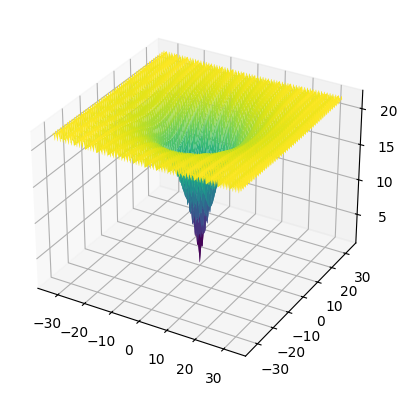

In [27]:
f = ackley

m = 1000 # Density of axes
p = 32.768 # Limit of the hipercube
# p = 2
x_axis = np.linspace(-p, p, m)
y_axis = np.linspace(-p, p, m)
F = np.zeros((m,m))

for i in range(m):
    x0 = x_axis[i]
    for j in range(m):
        y0 = y_axis[j]
        w = np.array([x0, y0])
        F[i, j] = f(w)

[X, Y] = np.meshgrid(x_axis, y_axis)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,F, cmap='viridis')

plt.show()